**Question1: Spectrogram of Audio File**

I recorded a short sentence, "*My name is Krishna Kumar Bais*", and saved the audio file as kk.MP3. The file was later processed using the Python library librosa to visualize the waveform and generate the spectrogram.


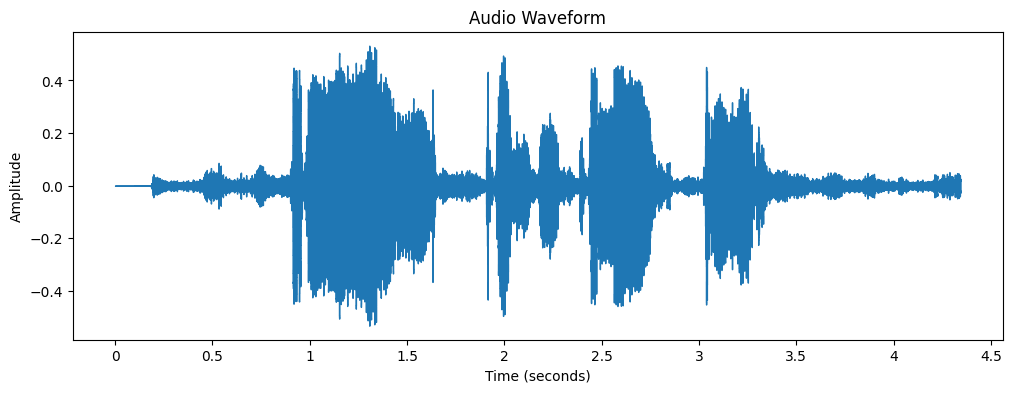

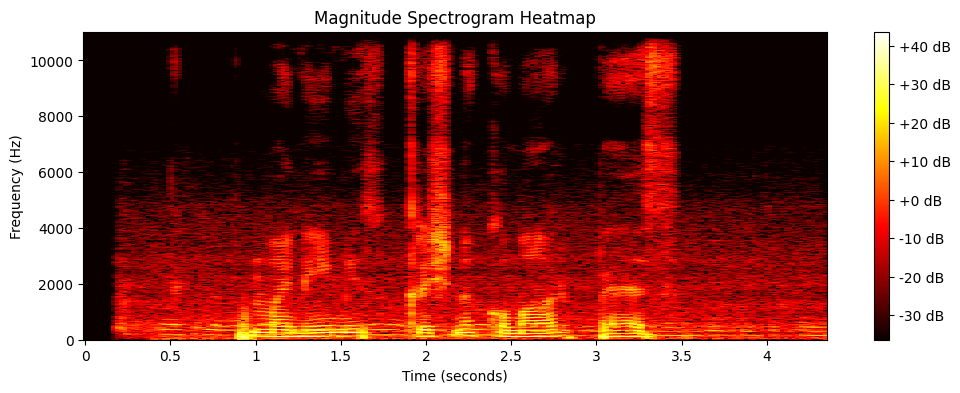

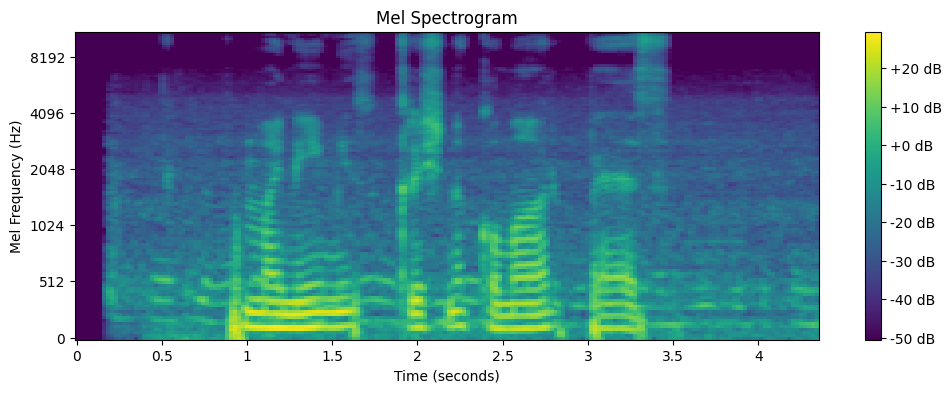

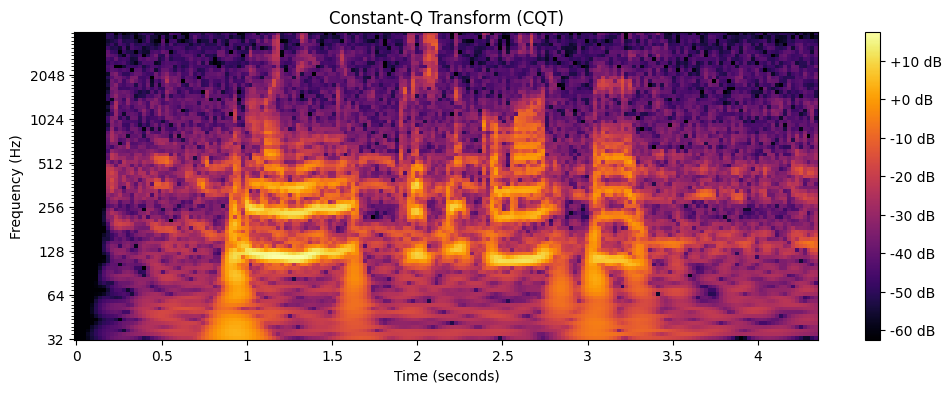

In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Load the audio file
audio_file_path = "kk.mp3"
audio_signal, sample_rate = librosa.load(audio_file_path)

# Plot the waveform of the audio
plt.figure(figsize=(12, 4))
librosa.display.waveshow(audio_signal, sr=sample_rate)
plt.title("Audio Waveform")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.show()

# Parameters for Short-Time Fourier Transform (STFT)
fft_window_size = 2048
hop_length = 512

# Compute the STFT of the audio signal
stft_output = librosa.stft(audio_signal, n_fft=fft_window_size, hop_length=hop_length)

# Calculate the magnitude spectrogram
magnitude_spectrogram = np.abs(stft_output) ** 2

# Function to display the spectrogram
def visualize_spectrogram(spectrogram_data, sr, hop_length, scale_type="linear", title="Spectrogram"):
    plt.figure(figsize=(12, 4))
    librosa.display.specshow(spectrogram_data, sr=sr, hop_length=hop_length, x_axis="time", y_axis=scale_type)
    plt.colorbar(format="%+2.0f dB")
    plt.title(title)
    plt.xlabel("Time (seconds)")
    plt.ylabel("Frequency (Hz)")
    plt.show()

# Visualize the magnitude spectrogram using a heatmap
plt.figure(figsize=(12, 4))
librosa.display.specshow(librosa.power_to_db(magnitude_spectrogram), sr=sample_rate, hop_length=hop_length, x_axis="time", y_axis="linear", cmap='hot')
plt.colorbar(format="%+2.0f dB")
plt.title("Magnitude Spectrogram Heatmap")
plt.xlabel("Time (seconds)")
plt.ylabel("Frequency (Hz)")
plt.show()

# Compute the Mel Spectrogram
mel_spectrogram = librosa.feature.melspectrogram(y=audio_signal, sr=sample_rate, n_fft=fft_window_size, hop_length=hop_length)
mel_spectrogram_db = librosa.power_to_db(mel_spectrogram)

# Plot the Mel Spectrogram
plt.figure(figsize=(12, 4))
librosa.display.specshow(mel_spectrogram_db, sr=sample_rate, hop_length=hop_length, x_axis="time", y_axis="mel", cmap='viridis')
plt.colorbar(format="%+2.0f dB")
plt.title("Mel Spectrogram")
plt.xlabel("Time (seconds)")
plt.ylabel("Mel Frequency (Hz)")
plt.show()

# Compute the Constant-Q Transform (CQT)
cqt_output = librosa.cqt(audio_signal, sr=sample_rate, hop_length=hop_length)
cqt_db = librosa.amplitude_to_db(np.abs(cqt_output))

# Plot the Constant-Q Transform
plt.figure(figsize=(12, 4))
librosa.display.specshow(cqt_db, sr=sample_rate, hop_length=hop_length, x_axis="time", y_axis="cqt_hz", cmap='inferno')
plt.colorbar(format="%+2.0f dB")
plt.title("Constant-Q Transform (CQT)")
plt.xlabel("Time (seconds)")
plt.ylabel("Frequency (Hz)")
plt.show()

**Question 2: Implementing a Human Posture Detection app**

**(a)**

The process of visualizing accelerometer data collected from a device placed in three different body positions: sitting, standing, and lying down. The accelerometer measures acceleration forces in three dimensions (X, Y, and Z), which can be analyzed to understand the movement and stability of the body in various postures.

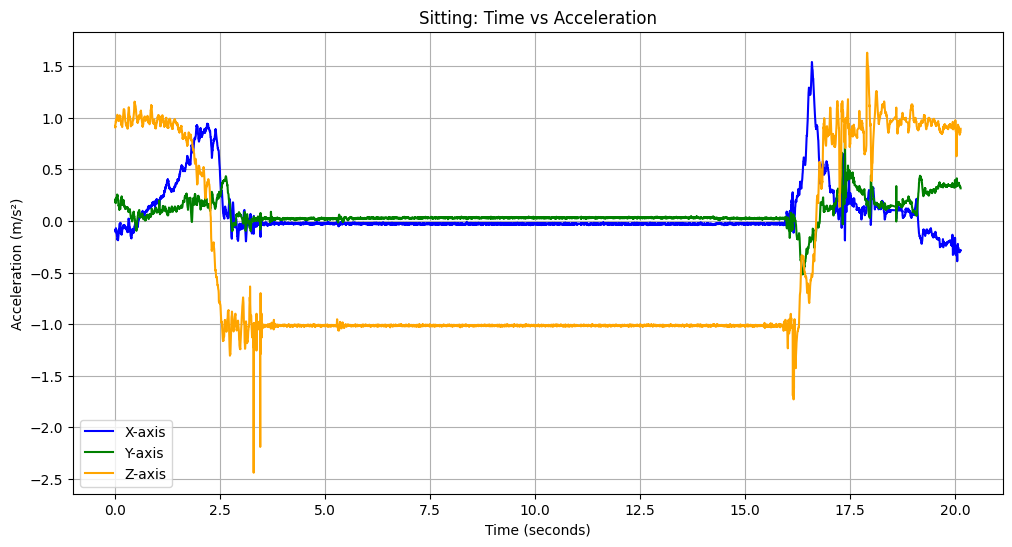

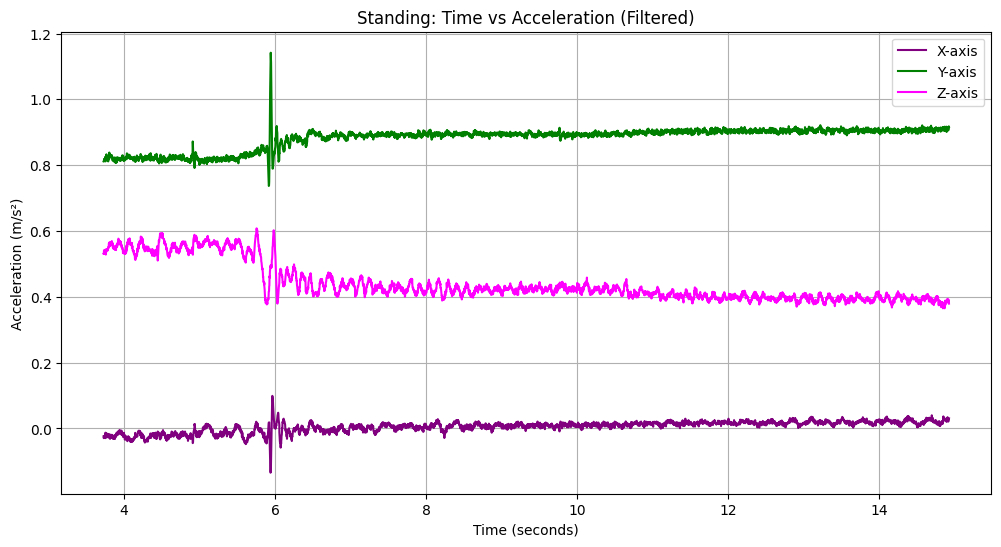

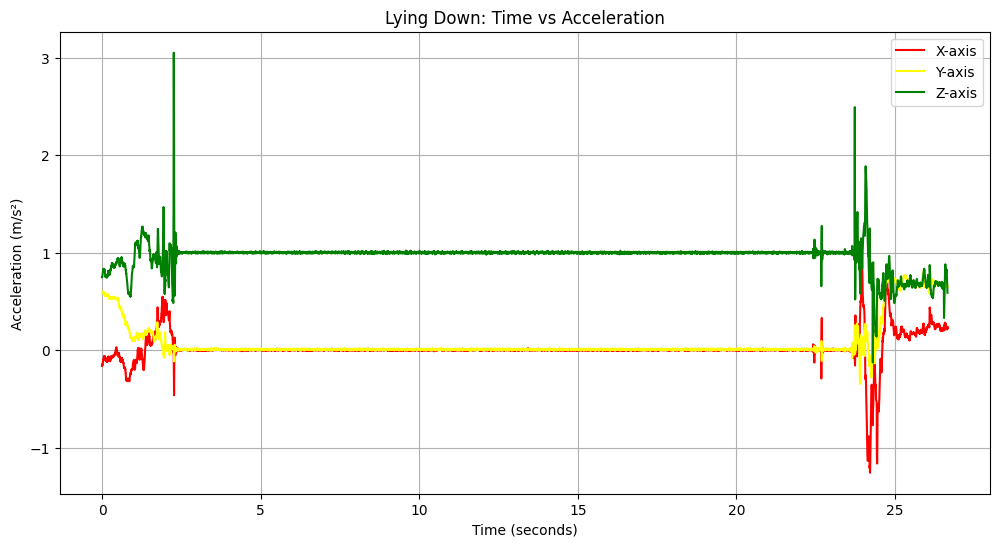

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to plot accelerometer data
def plot_acceleration_data(dataframe, position_name, color_map, title, filter_range=None):
    time_values = dataframe['time'].values
    x_acceleration = dataframe['gFx'].values
    y_acceleration = dataframe['gFy'].values
    z_acceleration = dataframe['gFz'].values
    
    if filter_range:
        start_idx, end_idx = filter_range
        time_values = time_values[start_idx:end_idx]
        x_acceleration = x_acceleration[start_idx:end_idx]
        y_acceleration = y_acceleration[start_idx:end_idx]
        z_acceleration = z_acceleration[start_idx:end_idx]
    
    plt.figure(figsize=(12, 6))
    plt.plot(time_values, x_acceleration, color=color_map['x'], label='X-axis')
    plt.plot(time_values, y_acceleration, color=color_map['y'], label='Y-axis')
    plt.plot(time_values, z_acceleration, color=color_map['z'], label='Z-axis')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Acceleration (m/s²)')
    plt.title(f'{position_name}: Time vs Acceleration' + (' (Filtered)' if filter_range else ''))
    plt.legend()
    plt.grid(True)
    plt.show()

# Load and plot data for different positions
# Sitting position
sitting_data = pd.read_csv('sitting_file.csv')
plot_acceleration_data(
    sitting_data,
    position_name='Sitting',
    color_map={'x': 'blue', 'y': 'green', 'z': 'orange'},
    title='Sitting: Time vs Acceleration'
)

# Standing position
standing_data = pd.read_csv('standing_file.csv')
plot_acceleration_data(
    standing_data,
    position_name='Standing',
    color_map={'x': 'purple', 'y': 'green', 'z': 'magenta'},
    filter_range=(1500, 6000),
    title='Standing: Time vs Acceleration'
)

# Lying down position
lying_data = pd.read_csv('sleeping_file.csv')
plot_acceleration_data(
    lying_data,
    position_name='Lying Down',
    color_map={'x': 'red', 'y': 'yellow', 'z': 'green'},
    title='Lying Down: Time vs Acceleration'
)

**(b)**

The process of classifying body postures based on accelerometer data collected from a smartphone. The accelerometer measures acceleration forces in three dimensions (X, Y, and Z), which can be analyzed to determine whether a person is sitting, standing, or lying down. The analysis includes loading the accelerometer data from JSON files, calculating the minimum and maximum values for each posture, and visualizing the results.

x: 0.02, y: 0.00, z: 1.00 => Lying Down
x: 0.06, y: -0.17, z: 0.98 => Sitting
x: 0.06, y: -0.17, z: 0.98 => Sitting
x: 0.01, y: -0.02, z: 0.99 => Sitting
x: 0.01, y: -0.02, z: 0.99 => Lying Down
x: 0.01, y: -0.02, z: 0.99 => Lying Down
x: 0.05, y: -0.17, z: 0.98 => Sitting
x: 0.06, y: -0.17, z: 0.98 => Sitting
x: 0.07, y: -0.17, z: 0.98 => Sitting
x: 0.10, y: -0.18, z: 0.93 => Sitting
x: 0.02, y: 0.01, z: 0.99 => Lying Down
x: 0.06, y: -0.17, z: 0.98 => Sitting
x: 0.06, y: -0.17, z: 0.98 => Sitting
x: 0.06, y: -0.17, z: 0.98 => Sitting
x: 0.06, y: -0.17, z: 0.98 => Sitting
x: -0.00, y: -1.03, z: 0.07 => Standing
x: 0.01, y: -1.03, z: 0.07 => Standing
x: 0.00, y: -1.03, z: 0.07 => Standing
x: 0.02, y: 0.00, z: 0.99 => Sitting
x: 0.98, y: -0.21, z: -0.20 => Standing
x: 0.02, y: 0.00, z: 0.99 => Sitting
x: 0.16, y: 0.02, z: 0.64 => Pattern Not Recognized
x: 0.77, y: 0.53, z: 0.15 => Standing
x: 0.14, y: -0.87, z: 0.08 => Standing
x: 0.09, y: 0.79, z: -0.03 => Pattern Not Recognized
x: -0.

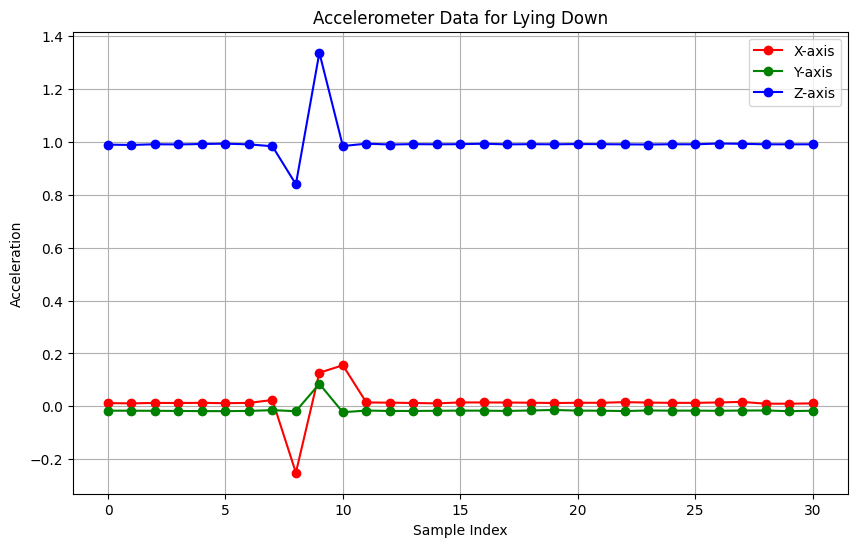

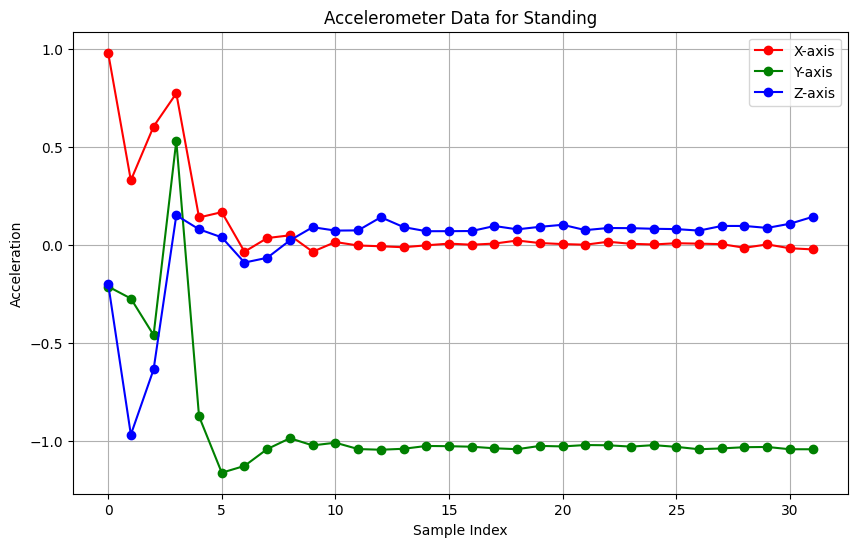

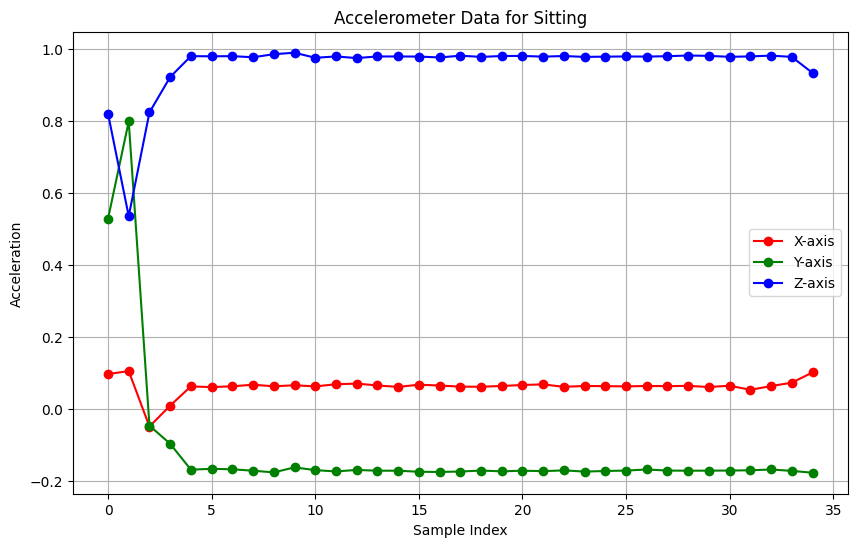

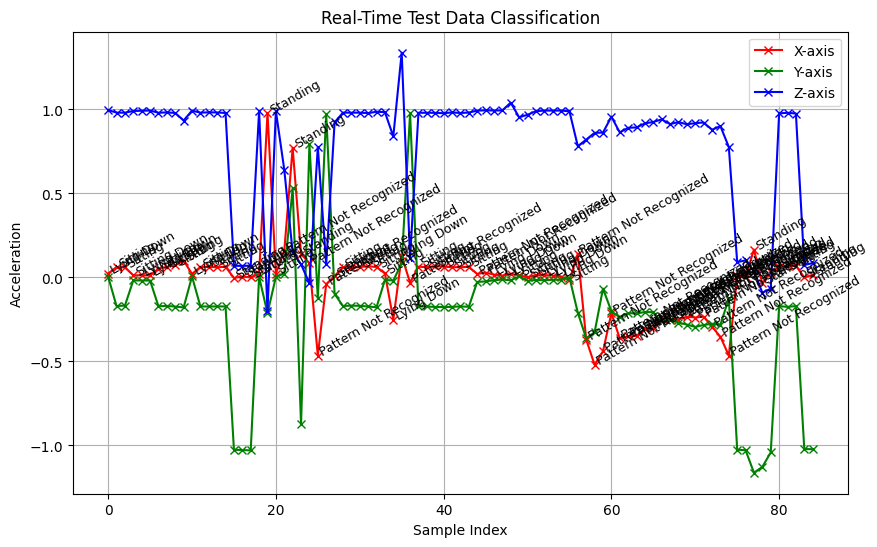

In [4]:
import json
import matplotlib.pyplot as plt

# Function to load accelerometer data from JSON files
def load_accelerometer_data(file_name):
    x_values, y_values, z_values = [], [], []
    
    with open(file_name, 'r') as file:
        for line in file:
            data = json.loads(line.strip())
            x_values.append(float(data['x']))
            y_values.append(float(data['y']))
            z_values.append(float(data['z']))
    
    return x_values, y_values, z_values

# Load data for various postures
sleep_x, sleep_y, sleep_z = load_accelerometer_data("KrishnaSleeping.txt")
stand_x, stand_y, stand_z = load_accelerometer_data("KrishnaStanding.txt")
sit_x, sit_y, sit_z = load_accelerometer_data("KrishnaSitting.txt")

# Function to compute min and max for each axis
def find_min_max(data):
    return min(data), max(data)

# Calculate min and max values for each axis of each posture
sleep_min_max = [find_min_max(sleep_x), find_min_max(sleep_y), find_min_max(sleep_z)]
stand_min_max = [find_min_max(stand_x), find_min_max(stand_y), find_min_max(stand_z)]
sit_min_max = [find_min_max(sit_x), find_min_max(sit_y), find_min_max(sit_z)]

# Function to classify posture based on accelerometer data
def determine_posture(ax, ay, az, posture_limits):
    return all(min_val <= val <= max_val for (min_val, max_val), val in zip(posture_limits, [ax, ay, az]))

# Load real-time testing data
test_x, test_y, test_z = load_accelerometer_data("KrishnaTesting.txt")

# Classify each test data point
classification_results = []
for i in range(len(test_x)):
    ax, ay, az = test_x[i], test_y[i], test_z[i]
    
    if determine_posture(ax, ay, az, stand_min_max):
        classification_results.append(("Standing", ax, ay, az))
        print(f"x: {ax:.2f}, y: {ay:.2f}, z: {az:.2f} => Standing")
    elif determine_posture(ax, ay, az, sit_min_max):
        classification_results.append(("Sitting", ax, ay, az))
        print(f"x: {ax:.2f}, y: {ay:.2f}, z: {az:.2f} => Sitting")
    elif determine_posture(ax, ay, az, sleep_min_max):
        classification_results.append(("Lying Down", ax, ay, az))
        print(f"x: {ax:.2f}, y: {ay:.2f}, z: {az:.2f} => Lying Down")
    else:
        classification_results.append(("Pattern Not Recognized", ax, ay, az))
        print(f"x: {ax:.2f}, y: {ay:.2f}, z: {az:.2f} => Pattern Not Recognized")

# Function to plot accelerometer data for each posture
def plot_accelerometer_data(x_data, y_data, z_data, posture_name):
    plt.figure(figsize=(10, 6))
    plt.plot(x_data, label='X-axis', color='r', marker='o')
    plt.plot(y_data, label='Y-axis', color='g', marker='o')
    plt.plot(z_data, label='Z-axis', color='b', marker='o')
    plt.title(f"Accelerometer Data for {posture_name}")
    plt.xlabel("Sample Index")
    plt.ylabel("Acceleration")
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot data for different postures
plot_accelerometer_data(sleep_x, sleep_y, sleep_z, "Lying Down")
plot_accelerometer_data(stand_x, stand_y, stand_z, "Standing")
plot_accelerometer_data(sit_x, sit_y, sit_z, "Sitting")

# Plotting real-time test data with classification results
test_labels = [result[0] for result in classification_results]
test_x_vals = [result[1] for result in classification_results]
test_y_vals = [result[2] for result in classification_results]
test_z_vals = [result[3] for result in classification_results]

plt.figure(figsize=(10, 6))
plt.plot(test_x_vals, label='X-axis', color='r', marker='x')
plt.plot(test_y_vals, label='Y-axis', color='g', marker='x')
plt.plot(test_z_vals, label='Z-axis', color='b', marker='x')

# Annotating classification results
for i, label in enumerate(test_labels):
    plt.text(i, test_x_vals[i], label, fontsize=9, color='black', rotation=30)

plt.title("Real-Time Test Data Classification")
plt.xlabel("Sample Index")
plt.ylabel("Acceleration")
plt.legend()
plt.grid(True)
plt.show()